In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import data_util
from scipy.interpolate import spline
from matplotlib import animation, rc
from IPython.display import HTML, Image

In [3]:
rc('animation', html='html5')

In [4]:
data, _ = data_util.get_data('test')
data = data.flatten()

num = 100
num_frames = 20

x = range(0, num + num_frames)
y = data[0:num + num_frames]
x_smooth = np.linspace(0, num + num_frames, num * 10)
y_smooth = spline(x, y, x_smooth)
# print x, y, x_smooth, y_smooth

/Users/qqcao/tf1.1/lib/python2.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  # Remove the CWD from sys.path while we load stuff.


Current size: [12.0, 6.0]
Current size: [12, 6]


(array([-0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 9 Text yticklabel objects>)

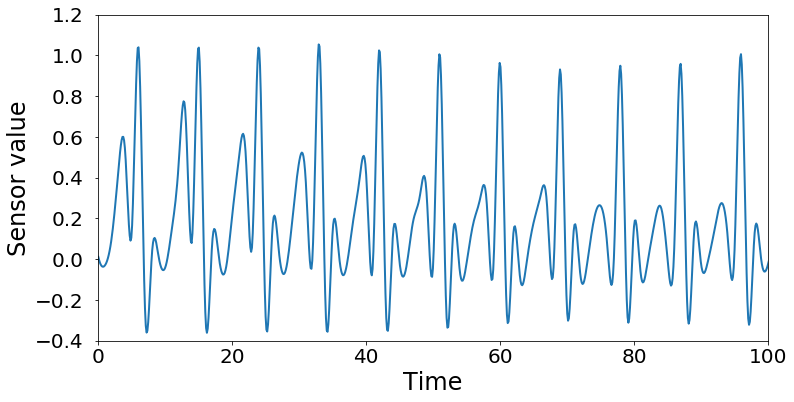

In [61]:
fig, ax = plt.subplots()
ax.set_ylim((-0.4, 1.2))
line, = ax.plot([], [], lw=2)
fig_size = plt.rcParams["figure.figsize"]
i = 0
x = x_smooth[i: i + num * 10]
y = y_smooth[i: i + num * 10]
line.set_data(x, y)
ax.set_xlim(i, i + num)
print "Current size:", fig_size
fig_size[0] = 12
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
print "Current size:", fig_size
plt.xlabel('Time', fontsize=24)
plt.ylabel('Sensor value', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [62]:
def init():
    line.set_data([], [])
    return (line,)

In [63]:
def animate(i):
    x = x_smooth[i: i + num * 10]
    y = y_smooth[i: i + num * 10]
    line.set_data(x, y)
    ax.set_xlim(i, i + num)
    return (line,)

In [64]:
# call the animator. blit=True means only re-draw the parts that 
# have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=num_frames, interval=200, blit=True)

In [65]:
anim.save('data/a.gif', writer='imagemagick', fps=5)

In [66]:
anim